Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
C:\Users\HP ENVY\AppData\Roaming\Python\Python312\site-packages\easyocr\detection.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on

Detected Texts:
Testing Date: Not found
Issue Date: Not found
Expiry Date: Not found


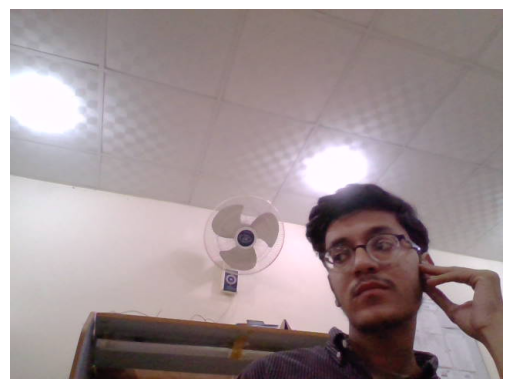

In [1]:
%pip install easyocr --user opencv-python matplotlib
import cv2
import easyocr
import re
from datetime import datetime
import matplotlib.pyplot as plt

# Initialize the EasyOCR reader
reader = easyocr.Reader(['en'])

# Regular expression patterns for matching dates and serial numbers
date_pattern = re.compile(r'\b(\d{1,2}[-/]\d{1,2}[-/]\d{2,4}|\d{1,2}\s\w{3,}\s\d{2,4})\b')
# Updated regular expression pattern for matching only the integer part of the serial number
serial_pattern = re.compile(r'(?:Sr\.?|Serial\s*No\.?)\s*(\d+)')

# Function to parse a date string based on detected format
def parse_date(date_str):
    for fmt in ('%d/%m/%y', '%d-%m-%y', '%d/%m/%Y', '%d-%m-%Y', '%d %b %y', '%d %b %Y'):
        try:
            return datetime.strptime(date_str, fmt)
        except ValueError:
            pass
    return None

# Function to process a frame for OCR and extract dates and serial numbers
def process_frame(frame):
    # Read text from the frame
    result = reader.readtext(frame)

    # Initialize variables for testing date, issue date, expiry date, and serial number
    testing_date = None
    issue_date = None
    expiry_date = None
    serial_number = None

    # Print all detected text and search for dates and serial numbers
    print("Detected Texts:")
    for detection in result:
        text = detection[1]
        print(text)
        
        # Search for dates
        date_matches = date_pattern.findall(text)
        for match in date_matches:
            parsed_date = parse_date(match)
            if parsed_date:
                if testing_date is None:
                    testing_date = parsed_date  # First date detected is the testing date
                elif issue_date is None:
                    issue_date = parsed_date  # Second date detected is the issue date
                elif expiry_date is None:
                    expiry_date = parsed_date  # Third date detected is the expiry date
        
        # Search for serial numbers
        serial_match = serial_pattern.search(text)
        if serial_match:
            serial_number = serial_match.group(1)
            print(f"Serial Number: {serial_number}")

    # Calculate the periods if all dates are found
    period_testing_issue = None
    period_issue_expiry = None

    if testing_date and issue_date:
        period_testing_issue = issue_date - testing_date

    if issue_date and expiry_date:
        period_issue_expiry = expiry_date - issue_date

    # Print the results
    print(f'Testing Date: {testing_date.strftime("%d %b %Y") if testing_date else "Not found"}')
    print(f'Issue Date: {issue_date.strftime("%d %b %Y") if issue_date else "Not found"}')
    print(f'Expiry Date: {expiry_date.strftime("%d %b %Y") if expiry_date else "Not found"}')

    if period_testing_issue:
        print(f'Period between Testing and Issue Dates: {period_testing_issue.days // 365} years, '
              f'{(period_testing_issue.days % 365) // 30} months, {period_testing_issue.days % 30} days')

    if period_issue_expiry:
        print(f'Period between Issue and Expiry Dates: {period_issue_expiry.days // 365} years, '
              f'{(period_issue_expiry.days % 365) // 30} months, {period_issue_expiry.days % 30} days')

# Open a connection to the webcam
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    if not ret:
        break

    # Process the current frame for OCR
    process_frame(frame)

    # Convert the frame to RGB (from BGR) for matplotlib
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Display the frame using matplotlib
    plt.imshow(frame_rgb)
    plt.axis('off')
    plt.show(block=False)
    plt.pause(0.001)

    # Ask the user if they want to continue or stop
    user_input = input("Press Enter to continue or 's' to stop: ")
    
    if user_input.lower() == 's':
        print("Stopping...")
        break

# Release the capture
cap.release()

In [5]:
%pip install easyocr --user opencv-python matplotlib
import cv2
import easyocr
import re
from datetime import datetime
import matplotlib.pyplot as plt

# Initialize the EasyOCR reader
reader = easyocr.Reader(['en'])

# Regular expression patterns for matching dates and serial numbers
date_pattern = re.compile(r'\b(\d{1,2}[-/]\d{1,2}[-/]\d{2,4}|\d{1,2}\s\w{3,}\s\d{2,4})\b')
# Updated regular expression pattern for matching only the integer part of the serial number
serial_pattern = re.compile(r'(?:Sr\.?|Serial\s*No\.?)\s*(\d+)')

# Function to parse a date string based on detected format
def parse_date(date_str):
    for fmt in ('%d/%m/%y', '%d-%m-%y', '%d/%m/%Y', '%d-%m-%Y', '%d %b %y', '%d %b %Y'):
        try:
            return datetime.strptime(date_str, fmt)
        except ValueError:
            pass
    return None

# Function to process a frame for OCR and extract dates and serial numbers
def process_frame(frame):
    # Read text from the frame
    result = reader.readtext(frame)

    # Initialize variables for testing date, issue date, expiry date, and serial number
    testing_date = None
    issue_date = None
    expiry_date = None
    serial_number = None

    # Print all detected text and search for dates and serial numbers
    print("Detected Texts:")
    for detection in result:
        text = detection[1]
        print(text)
        
        # Search for dates
        date_matches = date_pattern.findall(text)
        for match in date_matches:
            parsed_date = parse_date(match)
            if parsed_date:
                if testing_date is None:
                    testing_date = parsed_date  # First date detected is the testing date
                elif issue_date is None:
                    issue_date = parsed_date  # Second date detected is the issue date
                elif expiry_date is None:
                    expiry_date = parsed_date  # Third date detected is the expiry date
        
        # Search for serial numbers
        serial_match = serial_pattern.search(text)
        if serial_match:
            serial_number = serial_match.group(1)
            print(f"Serial Number: {serial_number}")

    # Calculate the periods if all dates are found
    period_testing_issue = None
    period_issue_expiry = None

    if testing_date and issue_date:
        period_testing_issue = issue_date - testing_date

    if issue_date and expiry_date:
        period_issue_expiry = expiry_date - issue_date

    # Print the results
    print(f'Testing Date: {testing_date.strftime("%d %b %Y") if testing_date else "Not found"}')
    print(f'Issue Date: {issue_date.strftime("%d %b %Y") if issue_date else "Not found"}')
    print(f'Expiry Date: {expiry_date.strftime("%d %b %Y") if expiry_date else "Not found"}')

    if period_testing_issue:
        print(f'Period between Testing and Issue Dates: {period_testing_issue.days // 365} years, '
              f'{(period_testing_issue.days % 365) // 30} months, {period_testing_issue.days % 30} days')

    if period_issue_expiry:
        print(f'Period between Issue and Expiry Dates: {period_issue_expiry.days // 365} years, '
              f'{(period_issue_expiry.days % 365) // 30} months, {period_issue_expiry.days % 30} days')

# Open a connection to the webcam
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    if not ret:
        print("Camera not found")
        break

    # Process the current frame for OCR
    process_frame(frame)

    # Convert the frame to RGB (from BGR) for matplotlib
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Display the frame using matplotlib
    plt.imshow(frame_rgb)
    plt.axis('off')
    plt.show(block=False)
    plt.pause(0.001)

    # Ask the user if they want to continue or stop
    user_input = input("Press Enter to continue or 's' to stop: ")
    
    if user_input.lower() == 's':
        print("Stopping...")
        break

# Release the capture
cap.release()

Note: you may need to restart the kernel to use updated packages.


AttributeError: module 'torch' has no attribute 'version'

In [6]:
%pip install pytesseract opencv-python matplotlib
import cv2
import pytesseract
import re
from datetime import datetime
import matplotlib.pyplot as plt

# Configure the path to the Tesseract executable if needed
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'  # Update the path if necessary

# Regular expression patterns for matching dates and serial numbers
date_pattern = re.compile(r'\b(\d{1,2}[-/]\d{1,2}[-/]\d{2,4}|\d{1,2}\s\w{3,}\s\d{2,4})\b')
serial_pattern = re.compile(r'(?:Sr\.?|Serial\s*No\.?)\s*(\d+)')

# Function to parse a date string based on detected format
def parse_date(date_str):
    for fmt in ('%d/%m/%y', '%d-%m-%y', '%d/%m/%Y', '%d-%m-%Y', '%d %b %y', '%d %b %Y'):
        try:
            return datetime.strptime(date_str, fmt)
        except ValueError:
            pass
    return None

# Function to process a frame for OCR and extract dates and serial numbers
def process_frame(frame):
    # Convert the frame to RGB (Tesseract expects RGB images)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Use Tesseract to read text from the frame
    text = pytesseract.image_to_string(rgb_frame)

    # Initialize variables for testing date, issue date, expiry date, and serial number
    testing_date = None
    issue_date = None
    expiry_date = None
    serial_number = None

    # Print all detected text and search for dates and serial numbers
    print("Detected Texts:")
    print(text)

    # Search for dates
    date_matches = date_pattern.findall(text)
    for match in date_matches:
        parsed_date = parse_date(match)
        if parsed_date:
            if testing_date is None:
                testing_date = parsed_date  # First date detected is the testing date
            elif issue_date is None:
                issue_date = parsed_date  # Second date detected is the issue date
            elif expiry_date is None:
                expiry_date = parsed_date  # Third date detected is the expiry date

    # Search for serial numbers
    serial_matches = serial_pattern.findall(text)
    if serial_matches:
        serial_number = serial_matches[0]  # Get the first serial number found
        print(f"Serial Number: {serial_number}")

    # Calculate the periods if all dates are found
    period_testing_issue = None
    period_issue_expiry = None

    if testing_date and issue_date:
        period_testing_issue = issue_date - testing_date

    if issue_date and expiry_date:
        period_issue_expiry = expiry_date - issue_date

    # Print the results
    print(f'Testing Date: {testing_date.strftime("%d %b %Y") if testing_date else "Not found"}')
    print(f'Issue Date: {issue_date.strftime("%d %b %Y") if issue_date else "Not found"}')
    print(f'Expiry Date: {expiry_date.strftime("%d %b %Y") if expiry_date else "Not found"}')

    if period_testing_issue:
        print(f'Period between Testing and Issue Dates: {period_testing_issue.days // 365} years, '
              f'{(period_testing_issue.days % 365) // 30} months, {period_testing_issue.days % 30} days')

    if period_issue_expiry:
        print(f'Period between Issue and Expiry Dates: {period_issue_expiry.days // 365} years, '
              f'{(period_issue_expiry.days % 365) // 30} months, {period_issue_expiry.days % 30} days')

# Open a connection to the webcam
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    if not ret:
        print("Camera not found")
        break

    # Process the current frame for OCR
    process_frame(frame)

    # Convert the frame to RGB (from BGR) for matplotlib
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Display the frame using matplotlib
    plt.imshow(frame_rgb)
    plt.axis('off')
    plt.show(block=False)
    plt.pause(0.001)

    # Ask the user if they want to continue or stop
    user_input = input("Press Enter to continue or 's' to stop: ")
    
    if user_input.lower() == 's':
        print("Stopping...")
        break

# Release the capture
cap.release()

TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.

In [7]:
tesseract --version

NameError: name 'tesseract' is not defined

In [8]:
print(pytesseract.get_tesseract_version())

TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.